In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Classifier
from sklearn.model_selection import train_test_split

# Imbalance - oversampling of the minority class
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve,roc_auc_score

In [2]:
df = pd.read_csv('Churn_In_Telecom.csv', low_memory=False)

Functions

Model Evaluation

In [3]:
def model_evaluation(model, X_train, y_train, X_test, y_test):
    # Predict labels for X_train and y_train 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # CALCULATION
    ###################################################################
    # Calculate the evaluation metrics for train data
    train_acc = accuracy_score(y_train, y_train_pred)
    train_prec = precision_score(y_train, y_train_pred)
    train_rec = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_cm = confusion_matrix(y_train, y_train_pred)

    # Calculate the evaluation metrics for test data
    test_acc = accuracy_score(y_test, y_test_pred)
    test_prec = precision_score(y_test, y_test_pred)
    test_rec = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_cm = confusion_matrix(y_test, y_test_pred)
    
    ###################################################################
    
    # PLOT & SUMMARY (training)
    ###################################################################
    # Confusion Matrix (training)
    sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix - Training Data")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
    
    # Evaluation metrics (training)
    print("Training Data:")
    print("Accuracy:", train_acc)
    print("Precision:", train_prec)
    print("Recall:", train_rec)
    print("F1-score:", train_f1)
    ###################################################################

    # PLOT & SUMMARY (test)
    ###################################################################
    # Confusion Matrix (test)
    sns.heatmap(test_cm, annot=True, fmt="d", cmap="Reds")
    plt.title("Confusion Matrix - Test Data")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    # Evaluation metrics (test)
    print("\nTest Data:")
    print("Accuracy:", test_acc)
    print("Precision:", test_prec)
    print("Recall:", test_rec)
    print("F1-score:", test_f1)
    ###################################################################


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [190]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [166]:
df.shape

(3333, 21)

In [4]:
# Replace column spaces with underscore

df.columns = df.columns.str.replace(' ','_')

In [5]:
# Remove unnecessary columns
df = df.drop('phone_number', axis=1)

In [6]:
# Updated DataFrame (renamed columns / dropped columns)
df.head(3)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [7]:
# Convert churn to binary
df['churn'] = df['churn'].map({True:1 ,False:0})
df['churn'] = df['churn'].astype(int)

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   international_plan      3333 non-null   int64  
 4   voice_mail_plan         3333 non-null   int64  
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

In [8]:
# Change international_plan and voice_mail_plan into binary values (0 and 1)

def binary_swap(column):
    df[column] = df[column].apply(lambda x: 1 if x == "yes" else (0 if x == "no" else x))
    
    return df

binary_swap('international_plan')
binary_swap('voice_mail_plan')

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


Account Length


<AxesSubplot:ylabel='Frequency'>

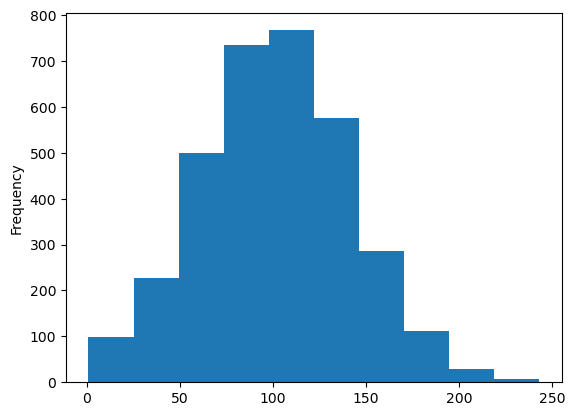

In [174]:
# Plot account_length
print('Account Length')
df.account_length.plot(kind='hist')

Churn


<AxesSubplot:>

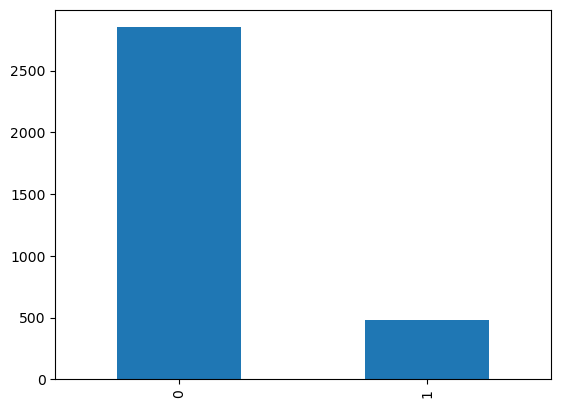

In [175]:
# Plot churn
print('Churn')
df.churn.value_counts().plot(kind='bar')

In [45]:
false_churn_percentage, true_churn_percentage = df.churn.value_counts(True)

In [46]:
# False churn percentage
print('False churn percentage: ', false_churn_percentage * 100)
print('False churns: ', df.churn.value_counts().values[0])

print( ' ')

# True churn percentage
print('True churn percentage: ', true_churn_percentage * 100)
print('True churns: ', df.churn.value_counts().values[1])

# Churn rate
churn_rate = pd.DataFrame(df.churn.value_counts(True))

False churn percentage:  85.5085508550855
False churns:  2850
 
True churn percentage:  14.491449144914492
True churns:  483


In [178]:
churn_rate

,churn
0,0.855086
1,0.144914


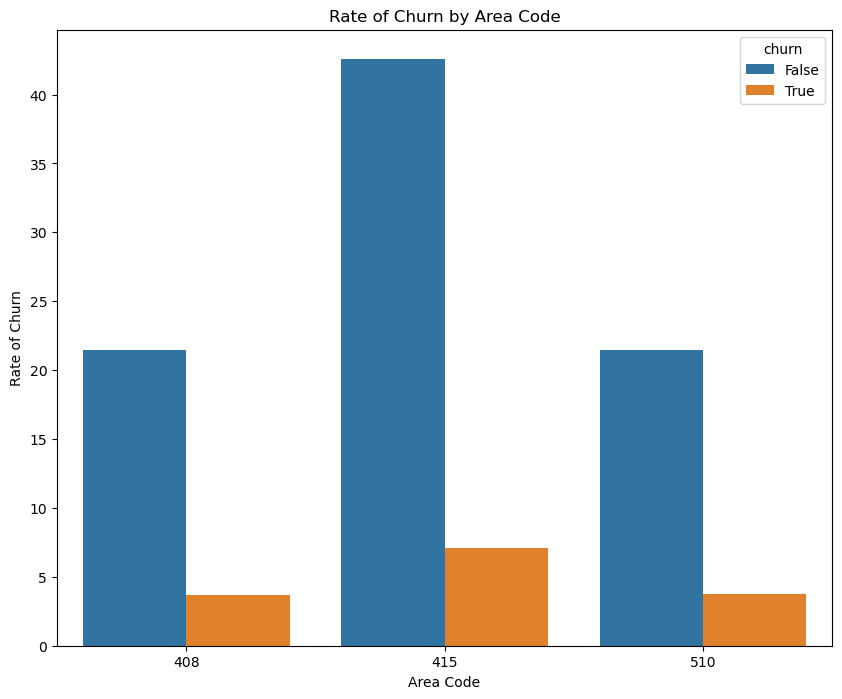

In [121]:
# Churn by area code

plt.figure(figsize=(10, 8))
sns.barplot(data=df, x='area_code', y='churn', hue='churn', estimator=lambda c: len(c) / len(df) * 100)
plt.xlabel('Area Code')
plt.ylabel('Rate of Churn')
plt.title('Rate of Churn by Area Code')
plt.show()


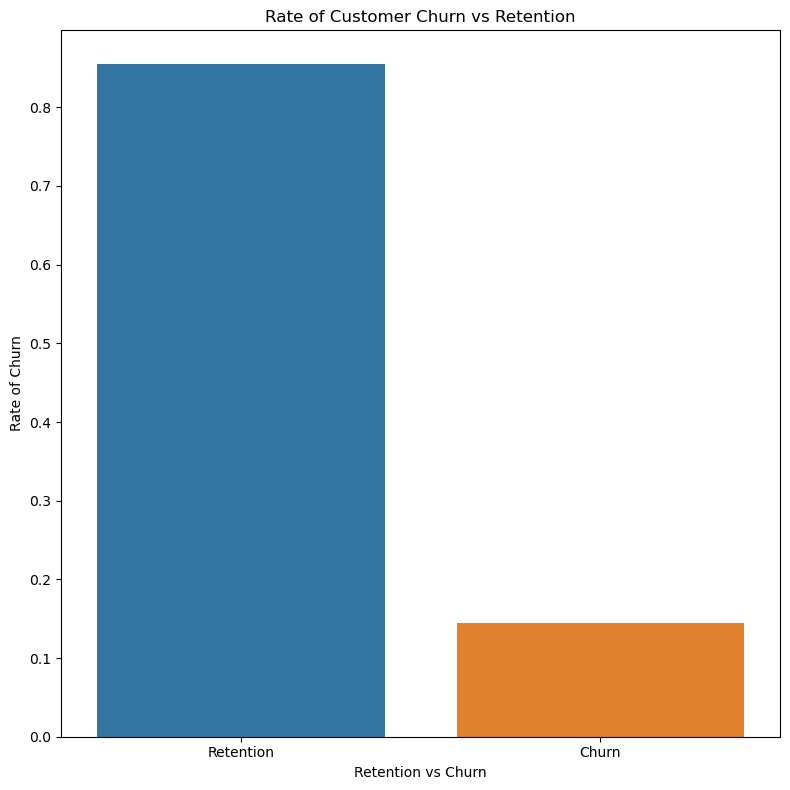

In [179]:
# Plot churn by rates

fig, ax = plt.subplots(figsize=(8,8))

sns.barplot(x = [0, 1], y = 'churn', data = churn_rate, ax = ax)
plt.title('Rate of Customer Churn vs Retention')
ax.tick_params(axis = 'both')
plt.xlabel('Retention vs Churn')
plt.ylabel('Rate of Churn')
ax.set_xticklabels(['Retention', 'Churn'])
plt.tight_layout()


In [69]:
# The dataset seems imbalanced when analyzing the churn rates
# There seems to be more values in False than in True

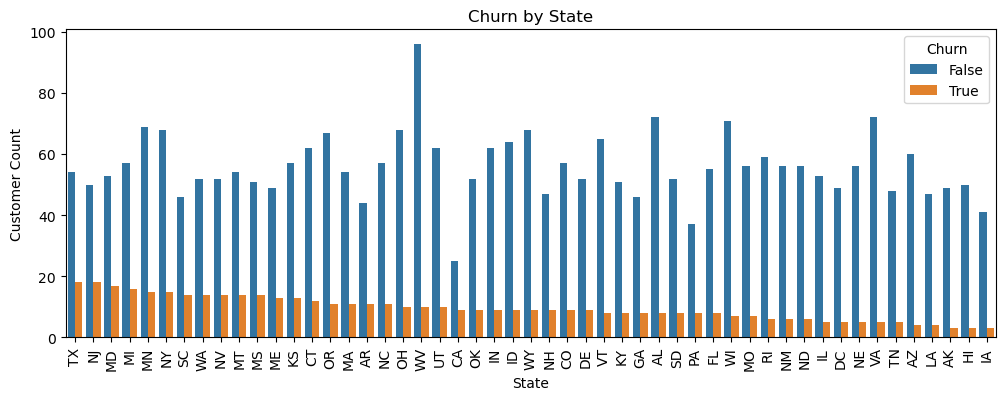

In [108]:
# Churn by State

plt.figure(figsize=(12, 4))
states_churn = df[df['churn'] == True]['state'].value_counts().index
sns.countplot(data=df, x='state', hue='churn', order=states_churn)
plt.xlabel('State')
plt.ylabel('Customer Count')
plt.title('Churn by State')
plt.xticks(rotation=90)
plt.legend(title='Churn', loc='upper right')
plt.show()

In [70]:
df.describe()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


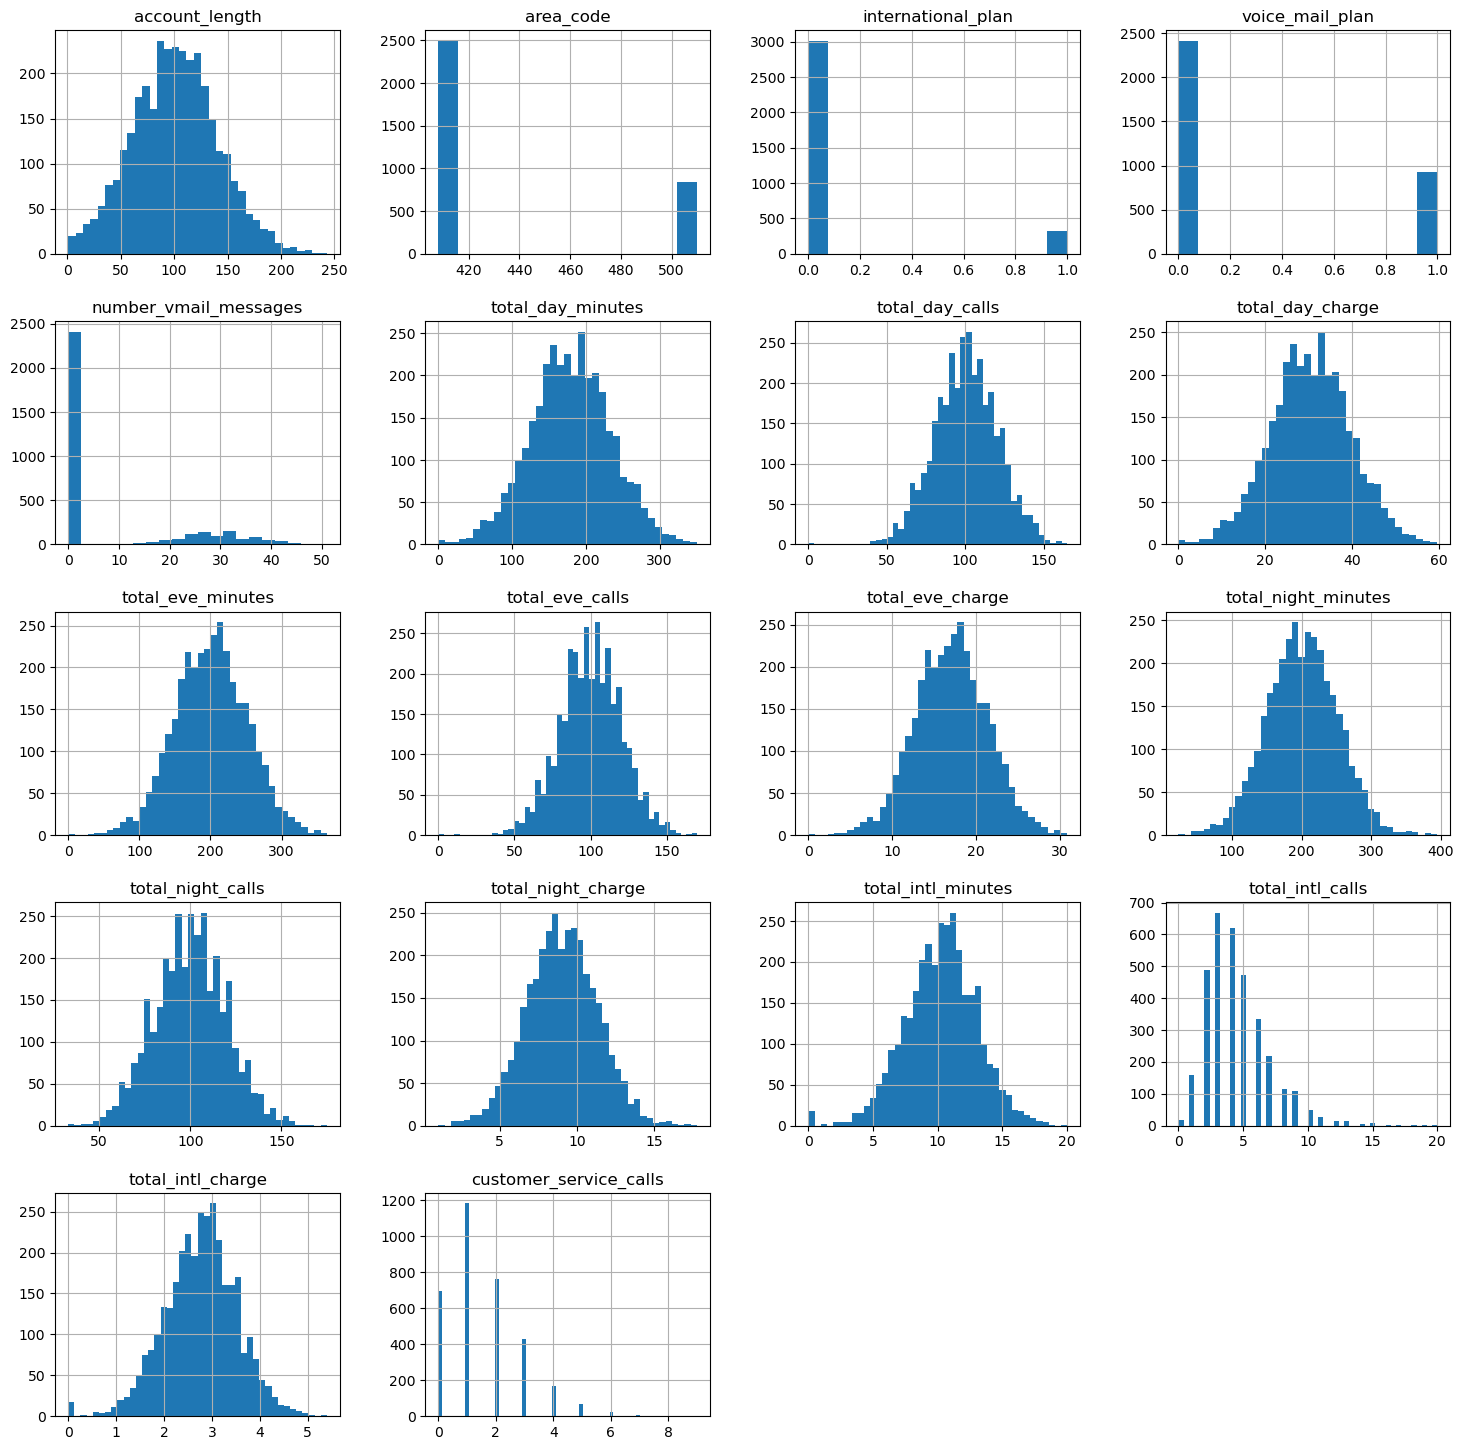

In [79]:
# Histogram excluding churn
df.drop('churn', axis=1).hist(figsize=(18,18), bins = 'auto');

<AxesSubplot:>

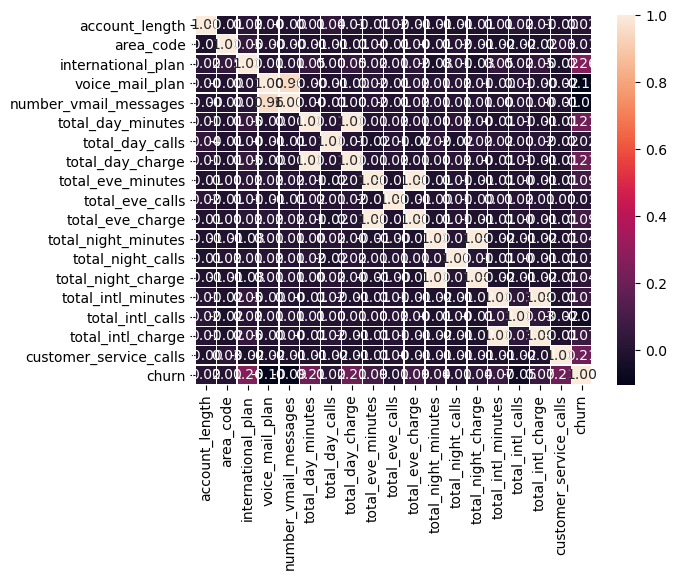

In [221]:
# Heatmap displaying correlation between columns
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=0.3)

## <font color = 'red'> Modeling Preparation </font>

#### Defining X and y variables

                                __________________Define X and y variables __________________

- To fit the data into a learning model, we need to convert the categories into dummy variables, which is denoted as binary in this case (0, 1). So to use the predictors (X-variable) in a model, for this case, a logistic regression, we must have dummy variables.  

In [55]:
# Defining X and y-variables
X = df.drop('churn', axis = 1)
y = df['churn']

In [56]:
# Converting categorical values using get_dummies
X = pd.get_dummies(X)
X.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international_plan_1,voice_mail_plan_1,area_code_415,area_code_510
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,0,1,1,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,0,1,1,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,0,0,1,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,0,1,0,0,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,1,0,1,0


In [272]:
X

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,0,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,0,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,0,0,0,0,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,1,36,156.2,77,26.55,215.5,126,...,0,0,0,0,0,0,0,0,0,0
3329,68,415,0,0,0,231.1,57,39.29,153.4,55,...,0,0,0,0,0,0,0,0,1,0
3330,28,510,0,0,0,180.8,109,30.74,288.8,58,...,0,0,0,0,0,0,0,0,0,0
3331,184,510,1,0,0,213.8,105,36.35,159.6,84,...,0,0,0,0,0,0,0,0,0,0


#### Train, Test, Split

                               _____________________Train-Test Split_____________________

- Making use of the Train-Test Split is vital as its used to estimate the performance of the learning model for predictions, when comparing the algorithms for the predictive model at hand.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [41]:
X_train

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international_plan_1,voice_mail_plan_1,area_code_415,area_code_510
367,45,0,78.2,127,13.29,253.4,108,21.54,255.0,100,...,0,0,0,0,0,0,0,0,1,0
3103,115,0,195.9,111,33.30,227.0,108,19.30,313.2,113,...,0,0,0,0,0,0,0,0,1,0
549,121,31,237.1,63,40.31,205.6,117,17.48,196.7,85,...,0,0,0,0,0,0,0,1,0,0
2531,180,0,143.3,134,24.36,180.5,113,15.34,184.2,87,...,0,0,0,0,0,0,0,0,1,0
2378,112,0,206.2,122,35.05,164.5,94,13.98,140.3,101,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,106,0,274.4,120,46.65,198.6,82,16.88,160.8,62,...,0,0,0,0,0,0,0,0,0,1
1130,122,0,35.1,62,5.97,180.8,89,15.37,251.6,58,...,0,0,0,0,0,0,0,0,1,0
1294,66,0,87.6,76,14.89,262.0,111,22.27,184.6,125,...,0,0,0,0,0,0,0,0,0,0
860,169,0,179.2,111,30.46,175.2,130,14.89,228.6,92,...,0,0,0,0,0,0,0,0,1,0


In [31]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2499 entries, 367 to 3174
Data columns (total 69 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          2499 non-null   int64  
 1   number_vmail_messages   2499 non-null   int64  
 2   total_day_minutes       2499 non-null   float64
 3   total_day_calls         2499 non-null   int64  
 4   total_day_charge        2499 non-null   float64
 5   total_eve_minutes       2499 non-null   float64
 6   total_eve_calls         2499 non-null   int64  
 7   total_eve_charge        2499 non-null   float64
 8   total_night_minutes     2499 non-null   float64
 9   total_night_calls       2499 non-null   int64  
 10  total_night_charge      2499 non-null   float64
 11  total_intl_minutes      2499 non-null   float64
 12  total_intl_calls        2499 non-null   int64  
 13  total_intl_charge       2499 non-null   float64
 14  customer_service_calls  2499 non-null 

    ______________________________________________________________________________________________________________________

#### One-Hot Encoder (WORK IN PROGRESS)

                                                   One Hot Encoder

In [15]:
categorical_columns = ['state','international_plan', 'voice_mail_plan', 'area_code']

In [16]:
def one_hot_encode(df, columns, drop_first=True):
    return pd.get_dummies(df, columns=columns, drop_first=drop_first)
columns_to_encode = categorical_columns
# one hot encode the categorical columns in the df
df = one_hot_encode(df, columns_to_encode)
# display the first 5 rows and columns to confirm
df.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international_plan_1,voice_mail_plan_1,area_code_415,area_code_510
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,0,1,1,0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,0,1,1,0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,0,0,1,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,0,1,0,0,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,1,0,1,0


In [20]:
#df['state'] = df['state'].astype(float)

In [23]:
#df.info()

In [ ]:
# Instantiate
ohe = OneHotEncoder(sparse = False, handle_unknown = "ignore")

# Fit 
ohe.fit(X_train[['state']])

# access the column names of the states
col_names = ohe.categories_[0]

# make a df with encoded states
train_state_encoded = pd.DataFrame(ohe.transform(X_train[["state"]]), 
                               index = X_train.index, 
                               columns = col_names)

# combine encoded states with X_t and drop old 'state' column
X_train = pd.concat([X_train.drop("state", axis = 1), train_state_encoded], axis = 1)

#### Standard Scaler

                                                  StandardScaler()

In [59]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to Dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_scaled.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international_plan_1,voice_mail_plan_1,area_code_415,area_code_510
0,-1.404508,-0.584700,-1.883677,1.330852,-1.884170,1.037727,0.401340,1.037905,1.069609,0.004940,...,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.1555,-0.327448,-0.611418,1.001201,-0.570111
1,0.366388,-0.584700,0.294083,0.529165,0.293703,0.516178,0.401340,0.517286,2.214376,0.670832,...,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.1555,-0.327448,-0.611418,1.001201,-0.570111
2,0.518179,1.685101,1.056392,-1.875896,1.056666,0.093407,0.849774,0.094283,-0.077125,-0.763398,...,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.1555,-0.327448,1.635543,-0.998800,-0.570111
3,2.010792,-0.584700,-0.679156,1.681590,-0.679320,-0.402459,0.650470,-0.403094,-0.322994,-0.660953,...,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.1555,-0.327448,-0.611418,1.001201,-0.570111
4,0.290493,-0.584700,0.484660,1.080325,0.484172,-0.718549,-0.296224,-0.719184,-1.186487,0.056162,...,-0.156845,-0.144338,-0.147201,-0.163417,-0.175899,-0.1555,-0.327448,-0.611418,-0.998800,1.754044


    ______________________________________________________________________________________________________________________

#### Resampling Data points (SMOTE)

                   ____________________________RESAMPLING - USING SMOTE____________________________

                                                        SMOTE

- We use the SMOTE, which stands for Synthetic Minority Oversampling Technique. This is a algorithm design to oversample the minority class. Since there is an imbalance in class 1 (True), we will need to apply SMOTE to generate synthetic data points that is based off the original data points.

- After applying SMOTE, the Synthetic sample class distribution is now 50/50, meaning the distribution of data points are now balanced.


In [60]:
# We need to use SMOTE to oversample the minority class, which in this case is True for churn
print('Imbalance of classes by rate')
print(churn_rate)

smote = SMOTE(random_state = 42)
X_train_scaled_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Imbalance of classes by rate
      churn
0  0.855086
1  0.144914
-----------------------------------------
Synthetic sample class distribution: 

1    2141
0    2141
Name: churn, dtype: int64


######  <font color = 'gray'> Before and After comparison of shape and class distribution

<font color= 'red'><b> Before Resampling </b></font>

In [250]:
# Class distribution
print('Class distribution: ')
print(y_train.value_counts())
print(' ')


# Shape
print('X-train: ', X_train.shape)
print('y-train: ', y_train.shape)

Class distribution: 
0    2141
1     358
Name: churn, dtype: int64
 
X-train:  (2499, 69)
y-train:  (2499,)


<font color= 'green'><b> After Resampling (SMOTE)</b> </font>

In [64]:
# Class distribution
print('Class distribution: ')
print(y_train_resampled.value_counts())
print(' ')

# Shape
print('Shape:')
print('X-train: ', X_train_scaled_resampled.shape)
print('y-train: ', y_train_resampled.shape)

Class distribution: 
1    2141
0    2141
Name: churn, dtype: int64
 
Shape:
X-train:  (4282, 69)
y-train:  (4282,)


    ______________________________________________________________________________________________________________________

#### Logistic Regression using Resampled Data points

                                                Logistic Regression

- This classification model is used to predict a binary outcome based on prior data observations, well suited for predicting customer churn (0, 1). Using churn as the dependent variables, y, we are able to see the relationships with the independent variables in X.

In [ ]:
# Resampled using SMOTE
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled_resampled, y_train_resampled)

print('Training Data:\n', classification_report(y_train_resampled, logreg.predict(X_train_scaled_resampled)))
print('Testing Data:\n', classification_report(y_test, logreg.predict(X_test_scaled)))

#### Model Evaluation

                                                 Model Evaluation

- To get a better indication of the performance of the Logistic Regression Model, we will define a function called model_evaluation, that will calculate:
        - Accuracy
        - Recall
        - Precision
        - F1-Score
  
  Then, it will plot a Confusion Matrix for the trained and test data, and result with a summary at the bottom of each matrix, showing us the values of the respective metrics listed above.

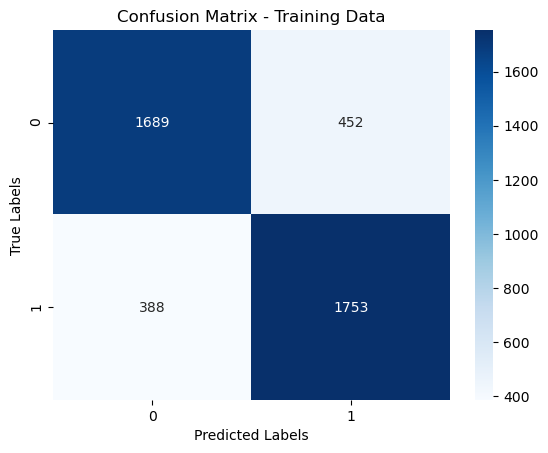

Training Data:
Accuracy: 0.8038299859878562
Precision: 0.7950113378684808
Recall: 0.8187762727697337
F1-score: 0.8067188219052002


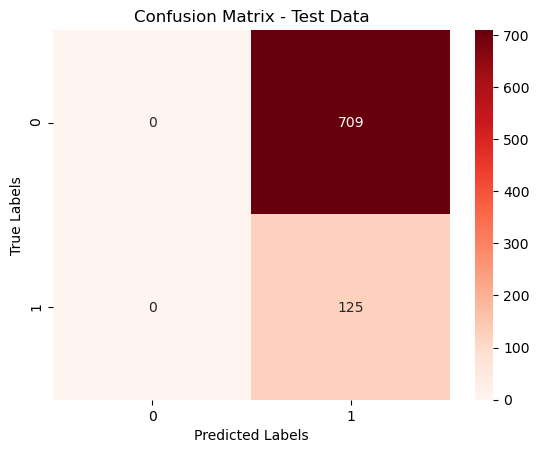


Test Data:
Accuracy: 0.1498800959232614
Precision: 0.1498800959232614
Recall: 1.0
F1-score: 0.26068821689259647


In [62]:
model_evaluation(logreg, X_train_scaled_resampled, y_train_resampled, X_test, y_test)

    ______________________________________________________________________________________________________________________